In [1]:
## Library Import

# Basic
import re
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# AutoML optuna library
import optuna
import optuna.integration.lightgbm as lgb

# Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Metric
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## for PCA
from sklearn.decomposition import PCA

# for VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('final_data_120_by_ffill_ver1.csv', index_col = 0)

In [3]:
df.reset_index(inplace = True)

In [4]:
date = df.date

In [5]:
target = df['KRXsemiconductor_close']

In [6]:
X_data = df.copy()

In [7]:
X_data.drop(['date', 'KRXsemiconductor_close'], axis = 1, inplace = True)

In [8]:
# scaling 하기전에 columns 뽑기 
col_name = X_data.columns

In [9]:
# scaling과 동시에 변환
X_data = StandardScaler().fit_transform(X_data)

In [10]:
# scaling하면 colname사라지므로 다시 생성
X_data = pd.DataFrame(X_data, columns = col_name)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target, test_size = 0.2, shuffle = False)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2572, 1005), (644, 1005), (2572,), (644,))

In [ ]:
'SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex', 'KOCPIYOYIndex', 'CPIXYOYIndex60', 'KOEAPYIndex60', 'GDPCTOT%Index', 'KOHOINCIndex', 'GVSK10YRIndex', 'USERTOTIndex60', 'SKhynix_close60', 'FDIUSGYOIndex60', 'MGT2REIndex60', 'GDPCPCECIndex60', 'Nvidia_close60', 'KOECSIMQIndex', 'Amazon_close60', 'PCECHNCIndex', 'KODIBALIndex', 'MSERIndex60', 'KOUHTTLIndex', 'Amazon_close260', 'LEIMNOIndex60', 'OEKRN022Index', 'CCMPIndex60', 'FDIDFDMOIndex60', 'QCOM_close60', 'KOCGCGSMIndex', 'TMNOCHNGIndex', 'AWHTOTLIndex60', 'NAPMNEWOIndex60', 'KOECFCSYIndex'

In [3]:
X_data

NameError: name 'X_data' is not defined

In [2]:
for i in X_data.columns:
    plot_acf(X_data[i])
    plt.title(i)
plt.show()

NameError: name 'X_data' is not defined

In [13]:
## Feature Selection Code
# Forward stepwise feature selection
# linear model 기준으로 유효 feature 뽑기. 돌리지 않아도 되는 코드

np.random.seed(0)

feature_name = list(X_train.columns)
feature_selected = []
score = []

for i in range(X_train.shape[1]):
    score_temp_list = np.zeros(len(feature_name))
    for j in range(len(feature_name)):
        temp = feature_selected.copy() 
        temp.append(feature_name[j])
        x_temp = X_train[temp]
        lr_temp = LinearRegression() 
        lr_temp.fit(x_temp, y_train)
        predict_temp = lr_temp.predict(X_test[temp])
        r2_temp = r2_score(y_test, predict_temp)
        score_temp = r2_temp
        score_temp_list[j] = score_temp 
        
    temp = feature_name[score_temp_list.argmax()]
    feature_selected.append(temp)
    feature_name.remove(temp)
    score.append(score_temp_list.max())
    print("%02d Selected: "%i, feature_selected)
    print("%02d Score : "%i, np.round(10000*np.array(score))/10000)
        
# finally selected features
feature_selected_final = feature_selected[:(np.array(score).argmax() + 1)]

00 Selected:  ['SKLICONEIndex']
00 Score :  [0.3465]
01 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex']
01 Score :  [0.3465 0.5682]
02 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60']
02 Score :  [0.3465 0.5682 0.6853]
03 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex']
03 Score :  [0.3465 0.5682 0.6853 0.7612]
04 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex', 'KOCPIYOYIndex']
04 Score :  [0.3465 0.5682 0.6853 0.7612 0.8056]
05 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex', 'KOCPIYOYIndex', 'CPIXYOYIndex60']
05 Score :  [0.3465 0.5682 0.6853 0.7612 0.8056 0.8288]
06 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex', 'KOCPIYOYIndex', 'CPIXYOYIndex60', 'KOEAPYIndex60']
06 Score :  [0.3465 0.5682 0.6853 0.7612 0.8056 0.8288 0.8453]
07 Selected:  ['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex', 'KOCPIYOYIndex', 'CPIXYOYIndex60', 'KOEAPYIndex60', 'GDPC

KeyboardInterrupt: 

In [14]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    def makedf(self):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

# Linear Model

In [15]:
# linear model select
ridge_reg = Ridge()
lr_reg = LinearRegression()
#lasso = Lasso(alpha = 100)

In [16]:
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [17]:
metr = CustomMetric(ridge_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.841737,0.4937,0.1710,0.2015,0.912898,0.98


In [18]:
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)

In [18]:
metr = CustomMetric(y_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,-0.357339,-2880542487653418014867456.0000,231249580113.4407,300230676252.6266,0.395963,0.217391


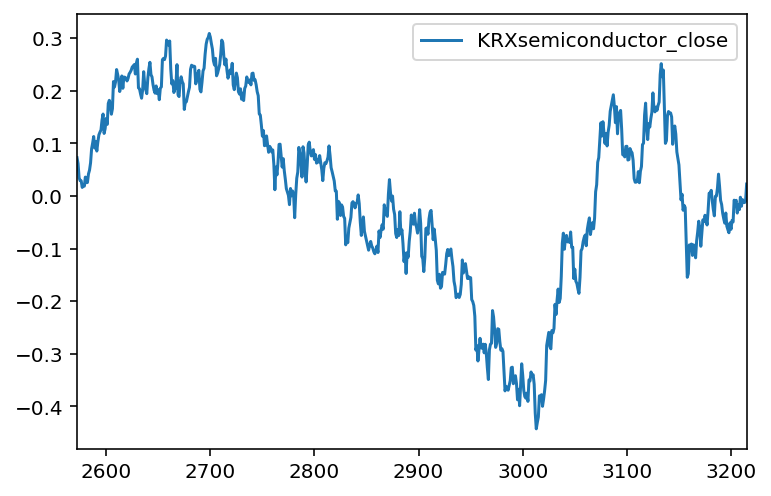

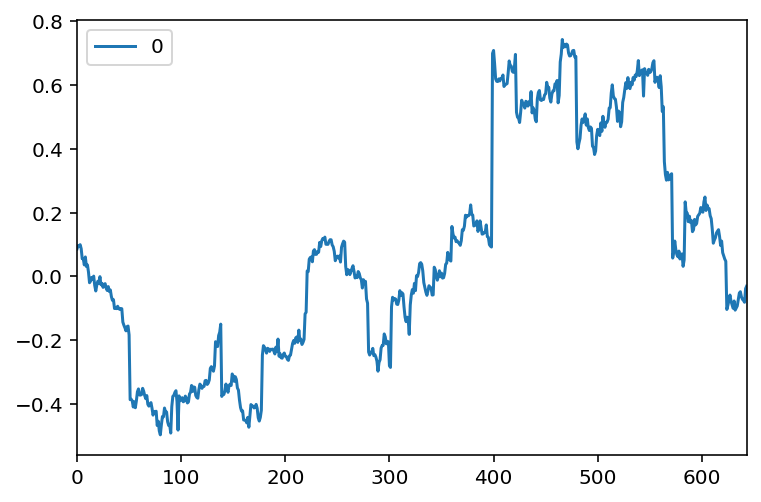

In [19]:
pd.DataFrame(y_test).plot()
pd.DataFrame(ridge_pred).plot()
plt.show()

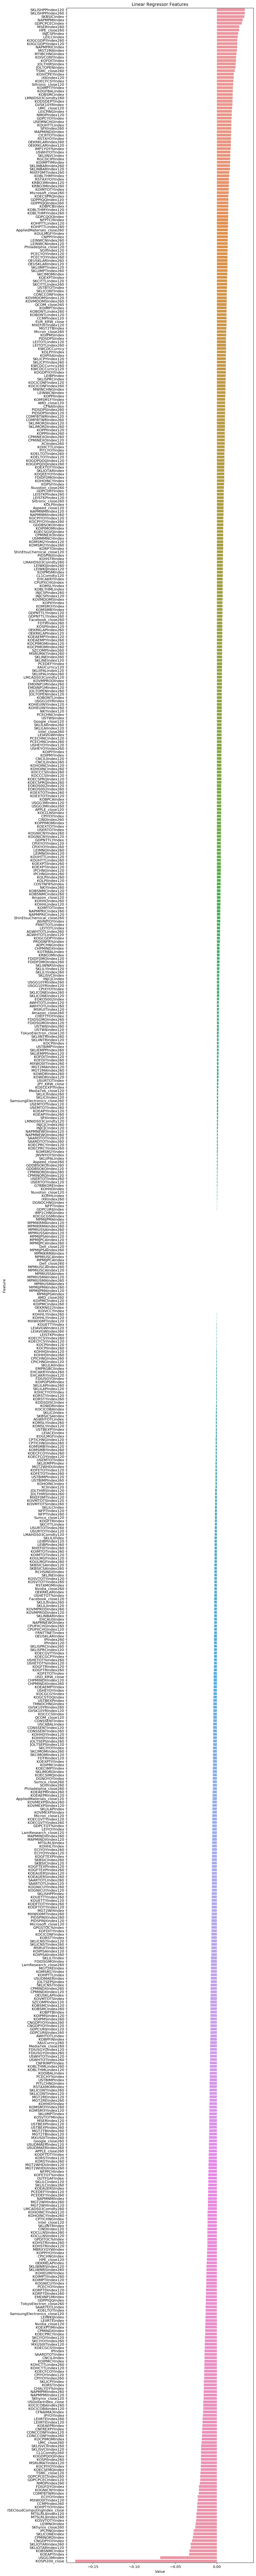

In [25]:
coef_imp = pd.DataFrame(sorted(zip(ridge_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])
coef_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (10, 100))
sns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))
plt.title('Linear Regressor Features')
plt.tight_layout()
plt.show()

In [39]:
a = coef_imp.sort_values(by = 'Value', ascending = False)[0:50]

In [55]:
tree_col = a.Feature.values

In [47]:
'''
coef_imp = pd.DataFrame(sorted(zip(lr_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])
coef_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 7))
sns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))
plt.title('Linear Regressor Features')
plt.tight_layout()
plt.show()
'''

"\ncoef_imp = pd.DataFrame(sorted(zip(lr_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])\ncoef_imp.sort_values(by = 'Value', ascending = False)\nplt.figure(figsize = (5, 7))\nsns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))\nplt.title('Linear Regressor Features')\nplt.tight_layout()\nplt.show()\n"

Tree Model은 feature importance가 따로 뽑히므로 아래와 같이 시각화

# Optuna AutoML을 통한 LightGBM Hyperparameter tuning

hyperparameter tuning 전, Ridge 상위 변수 반영

In [20]:
tree_col

NameError: name 'tree_col' is not defined

In [24]:
treedf = df[['SKLISHPPIndex120', 'SKLISHPPIndex260', 'SKBSICIndex',
       'NAPMPMIIndex', 'GDPCPCECIndex', 'MSERIndex260', 'HPE_close260',
       'INJCSPIndex', 'LEILCIIndex', 'KOGCGDPYIndex260',
       'KOGCGDPYIndex120', 'NAPMPRICIndex', 'MGT2MAIndex',
       'MTIBCHNGIndex', 'KOIVCONYIndex', 'KOFDITIndex', 'JOLTHIRSIndex',
       'JOLTOPENIndex', 'TSMC_close260', 'KOIVCPEYIndex', 'IXKIndex120',
       'KOECFCSYIndex', 'Siltronic_close120', 'KOIMPTIYIndex',
       'KOGFBALIndex', 'KOBSMCIndex', 'LMNIDS03Comdty260',
       'KODSDEPTIndex', 'GVSK10YRIndex', 'UMC_close120', 'LEICHNGIndex',
       'NMDPIndex120', 'GDPCYOYIndex', 'USEMNCHGIndex', 'KOUHTTLIndex',
       'SPXIndex260', 'MAPMINDXIndex', 'CICRTOTIndex', 'RSTAYOYIndex',
       'OEKRKLARIndex260', 'OEKRKLARIndex120', 'IMP1YOY%Index',
       'USWHTOTIndex', 'SKLIINVCIndex', 'RGCDCIPIIndex', 'KOIMPTIMIndex',
       'SKLINBARIndex260', 'SKLINBARIndex120', 'MXEF0MTIndex260',
       'KOBLTHMYIndex']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(treedf, target, test_size = 0.09, shuffle = False)

In [26]:
import sklearn.ensemble
import sklearn.model_selection
from sklearn.metrics import r2_score
import optuna
import optuna.integration.lightgbm as lgb

In [27]:
dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'l2',
    'verbosity': -1,
    'boosting_type': 'gbdt',
}

best_params, tuning_history = dict(), list()

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dval],
                  best_params=best_params,
                  tuning_history=tuning_history,
                  verbose_eval=100,
                  early_stopping_rounds=100,
                  )

prediction = np.rint(model.predict(X_test, num_iteration=model.best_iteration))
r2_score = r2_score(y_test, prediction)

print('Number of finished trials: {}'.format(len(tuning_history)))
print('Best params:', best_params)
print('  r2_score = {}'.format(r2_score))
print('  Params: ')
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

tune_feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000384548	valid_1's l2: 0.102823
[200]	training's l2: 0.000198063	valid_1's l2: 0.102671
Early stopping, best iteration is:
[199]	training's l2: 0.000199333	valid_1's l2: 0.102667


tune_feature_fraction, val_score: 0.102667:  14%|#4        | 1/7 [00:00<00:01,  4.05it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000379031	valid_1's l2: 0.0924933
[200]	training's l2: 0.000189774	valid_1's l2: 0.0904145
[300]	training's l2: 0.000115807	valid_1's l2: 0.0906415
Early stopping, best iteration is:
[207]	training's l2: 0.000182908	valid_1's l2: 0.0901959


tune_feature_fraction, val_score: 0.090196:  29%|##8       | 2/7 [00:00<00:01,  3.99it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000362463	valid_1's l2: 0.0817666
[200]	training's l2: 0.000177214	valid_1's l2: 0.0795087
[300]	training's l2: 0.000109055	valid_1's l2: 0.0793034
Early stopping, best iteration is:
[240]	training's l2: 0.000143996	valid_1's l2: 0.0790915


tune_feature_fraction, val_score: 0.079092:  43%|####2     | 3/7 [00:00<00:01,  3.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000357418	valid_1's l2: 0.103368
[200]	training's l2: 0.000178947	valid_1's l2: 0.101821
[300]	training's l2: 0.000108143	valid_1's l2: 0.101407
[400]	training's l2: 7.15359e-05	valid_1's l2: 0.101507
Early stopping, best iteration is:
[302]	training's l2: 0.000106724	valid_1's l2: 0.101384


tune_feature_fraction, val_score: 0.079092:  57%|#####7    | 4/7 [00:01<00:00,  3.40it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000361619	valid_1's l2: 0.114011
[200]	training's l2: 0.000175951	valid_1's l2: 0.112965
[300]	training's l2: 0.000104268	valid_1's l2: 0.113046
[400]	training's l2: 6.69139e-05	valid_1's l2: 0.112604
Early stopping, best iteration is:
[347]	training's l2: 8.40617e-05	valid_1's l2: 0.112289


tune_feature_fraction, val_score: 0.079092:  71%|#######1  | 5/7 [00:01<00:00,  3.04it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000353432	valid_1's l2: 0.116715
[200]	training's l2: 0.000172081	valid_1's l2: 0.114775
[300]	training's l2: 0.000103788	valid_1's l2: 0.114104
[400]	training's l2: 6.68346e-05	valid_1's l2: 0.113994
[500]	training's l2: 4.56003e-05	valid_1's l2: 0.113738
[600]	training's l2: 3.1906e-05	valid_1's l2: 0.113234
[700]	training's l2: 2.28896e-05	valid_1's l2: 0.113229
[800]	training's l2: 1.67382e-05	valid_1's l2: 0.113106
[900]	training's l2: 1.22532e-05	valid_1's l2: 0.112881
Early stopping, best iteration is:
[842]	training's l2: 1.44961e-05	valid_1's l2: 0.112856


tune_feature_fraction, val_score: 0.079092:  86%|########5 | 6/7 [00:02<00:00,  1.98it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000349407	valid_1's l2: 0.124793
[200]	training's l2: 0.000169974	valid_1's l2: 0.124346
[300]	training's l2: 0.000101194	valid_1's l2: 0.124106
Early stopping, best iteration is:
[268]	training's l2: 0.000119025	valid_1's l2: 0.12394


tune_num_leaves, val_score: 0.079092:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000128582	valid_1's l2: 0.0849914
[200]	training's l2: 3.914e-05	valid_1's l2: 0.0844925
[300]	training's l2: 1.73152e-05	valid_1's l2: 0.0843772
Early stopping, best iteration is:
[270]	training's l2: 2.16237e-05	valid_1's l2: 0.0843153


tune_num_leaves, val_score: 0.079092:   5%|5         | 1/20 [00:00<00:16,  1.18it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000128582	valid_1's l2: 0.0849914
[200]	training's l2: 3.914e-05	valid_1's l2: 0.0844925
[300]	training's l2: 1.73152e-05	valid_1's l2: 0.0843772
Early stopping, best iteration is:
[270]	training's l2: 2.16237e-05	valid_1's l2: 0.0843153


tune_num_leaves, val_score: 0.079092:  10%|#         | 2/20 [00:01<00:15,  1.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000128582	valid_1's l2: 0.0849914
[200]	training's l2: 3.914e-05	valid_1's l2: 0.0844925
[300]	training's l2: 1.73152e-05	valid_1's l2: 0.0843772
Early stopping, best iteration is:
[270]	training's l2: 2.16237e-05	valid_1's l2: 0.0843153


tune_num_leaves, val_score: 0.079092:  15%|#5        | 3/20 [00:02<00:15,  1.09it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000128582	valid_1's l2: 0.0849914
[200]	training's l2: 3.914e-05	valid_1's l2: 0.0844925
[300]	training's l2: 1.73152e-05	valid_1's l2: 0.0843772
Early stopping, best iteration is:
[270]	training's l2: 2.16237e-05	valid_1's l2: 0.0843153


tune_num_leaves, val_score: 0.079092:  20%|##        | 4/20 [00:03<00:14,  1.11it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000135511	valid_1's l2: 0.0838336
[200]	training's l2: 4.29871e-05	valid_1's l2: 0.0828934
[300]	training's l2: 1.85284e-05	valid_1's l2: 0.0827507
[400]	training's l2: 9.54669e-06	valid_1's l2: 0.0825317
[500]	training's l2: 5.52316e-06	valid_1's l2: 0.0825019
Early stopping, best iteration is:
[469]	training's l2: 6.46868e-06	valid_1's l2: 0.082475


tune_num_leaves, val_score: 0.079092:  25%|##5       | 5/20 [00:04<00:14,  1.01it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00035478	valid_1's l2: 0.0839986
[200]	training's l2: 0.000171907	valid_1's l2: 0.0829913
Early stopping, best iteration is:
[148]	training's l2: 0.000242704	valid_1's l2: 0.0828565


tune_num_leaves, val_score: 0.079092:  30%|###       | 6/20 [00:05<00:10,  1.31it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000602486	valid_1's l2: 0.0837557
Early stopping, best iteration is:
[56]	training's l2: 0.000898828	valid_1's l2: 0.0820683


tune_num_leaves, val_score: 0.079092:  35%|###5      | 7/20 [00:05<00:07,  1.74it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000602486	valid_1's l2: 0.0837557
Early stopping, best iteration is:
[56]	training's l2: 0.000898828	valid_1's l2: 0.0820683


tune_num_leaves, val_score: 0.079092:  40%|####      | 8/20 [00:05<00:05,  2.25it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000133468	valid_1's l2: 0.0838505
[200]	training's l2: 4.2207e-05	valid_1's l2: 0.0829
[300]	training's l2: 1.84493e-05	valid_1's l2: 0.082696
[400]	training's l2: 9.57506e-06	valid_1's l2: 0.0825541
[500]	training's l2: 5.60382e-06	valid_1's l2: 0.0825033
[600]	training's l2: 3.53192e-06	valid_1's l2: 0.0824709
[700]	training's l2: 2.44205e-06	valid_1's l2: 0.0824601
[800]	training's l2: 1.71474e-06	valid_1's l2: 0.0824449
[900]	training's l2: 1.26256e-06	valid_1's l2: 0.0824437
Early stopping, best iteration is:
[875]	training's l2: 1.35758e-06	valid_1's l2: 0.0824411


tune_num_leaves, val_score: 0.079092:  45%|####5     | 9/20 [00:07<00:10,  1.03it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000128582	valid_1's l2: 0.0849914
[200]	training's l2: 3.914e-05	valid_1's l2: 0.0844925
[300]	training's l2: 1.73152e-05	valid_1's l2: 0.0843772
Early stopping, best iteration is:
[270]	training's l2: 2.16237e-05	valid_1's l2: 0.0843153


tune_num_leaves, val_score: 0.079092:  50%|#####     | 10/20 [00:08<00:09,  1.05it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000193832	valid_1's l2: 0.0848133
Early stopping, best iteration is:
[73]	training's l2: 0.000277545	valid_1's l2: 0.0841197


tune_num_leaves, val_score: 0.079092:  55%|#####5    | 11/20 [00:08<00:06,  1.34it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00131287	valid_1's l2: 0.0811533
Early stopping, best iteration is:
[34]	training's l2: 0.00329028	valid_1's l2: 0.0778518


tune_num_leaves, val_score: 0.077852:  60%|######    | 12/20 [00:08<00:05,  1.34it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000891336	valid_1's l2: 0.0875807
Early stopping, best iteration is:
[67]	training's l2: 0.00114887	valid_1's l2: 0.0868503


tune_num_leaves, val_score: 0.077852:  65%|######5   | 13/20 [00:08<00:03,  1.82it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00020906	valid_1's l2: 0.0913155
[200]	training's l2: 8.42419e-05	valid_1's l2: 0.0913124
Early stopping, best iteration is:
[123]	training's l2: 0.00016352	valid_1's l2: 0.090798


tune_num_leaves, val_score: 0.077852:  70%|#######   | 14/20 [00:09<00:02,  2.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00342397	valid_1's l2: 0.0866347
Early stopping, best iteration is:
[30]	training's l2: 0.0116401	valid_1's l2: 0.0810454


tune_num_leaves, val_score: 0.077852:  75%|#######5  | 15/20 [00:09<00:02,  2.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00184524	valid_1's l2: 0.0774442
Early stopping, best iteration is:
[75]	training's l2: 0.00231989	valid_1's l2: 0.0765231


tune_num_leaves, val_score: 0.076523:  80%|########  | 16/20 [00:09<00:01,  2.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000198142	valid_1's l2: 0.0849067
[200]	training's l2: 7.6421e-05	valid_1's l2: 0.0838209
[300]	training's l2: 3.74599e-05	valid_1's l2: 0.0837905
Early stopping, best iteration is:
[221]	training's l2: 6.45552e-05	valid_1's l2: 0.0835253


tune_num_leaves, val_score: 0.076523:  85%|########5 | 17/20 [00:10<00:01,  2.26it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000128582	valid_1's l2: 0.0849914
[200]	training's l2: 3.914e-05	valid_1's l2: 0.0844925
[300]	training's l2: 1.73152e-05	valid_1's l2: 0.0843772
Early stopping, best iteration is:
[270]	training's l2: 2.16237e-05	valid_1's l2: 0.0843153


tune_num_leaves, val_score: 0.076523:  90%|######### | 18/20 [00:11<00:01,  1.21it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000304795	valid_1's l2: 0.089004
[200]	training's l2: 0.000146971	valid_1's l2: 0.0867806
[300]	training's l2: 8.52605e-05	valid_1's l2: 0.0867829
Early stopping, best iteration is:
[254]	training's l2: 0.000107938	valid_1's l2: 0.0864033


tune_num_leaves, val_score: 0.076523:  95%|#########5| 19/20 [00:12<00:00,  1.40it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000150638	valid_1's l2: 0.0811936
[200]	training's l2: 5.00476e-05	valid_1's l2: 0.0799244
[300]	training's l2: 2.22022e-05	valid_1's l2: 0.0795248
[400]	training's l2: 1.14227e-05	valid_1's l2: 0.0793214
[500]	training's l2: 6.4939e-06	valid_1's l2: 0.0792413
[600]	training's l2: 4.07043e-06	valid_1's l2: 0.0791763
Early stopping, best iteration is:
[596]	training's l2: 4.13775e-06	valid_1's l2: 0.079173


tune_num_leaves, val_score: 0.076523: 100%|##########| 20/20 [00:13<00:00,  1.46it/s]
tune_bagging_fraction_and_bagging_freq, val_score: 0.076523:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00182575	valid_1's l2: 0.0803895
[200]	training's l2: 0.00117731	valid_1's l2: 0.0759149
Early stopping, best iteration is:
[139]	training's l2: 0.00145936	valid_1's l2: 0.0745956


tune_bagging_fraction_and_bagging_freq, val_score: 0.074596:   0%|          | 0/10 [00:00<?, ?it/s][I 2020-03-26 00:48:31,172] Finished trial#0 resulted in value: 0.07459558433418455. Current best value is 0.07459558433418455 with parameters: {'bagging_fraction': 0.5388446526224461, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.074596:  10%|#         | 1/10 [00:00<00:01,  8.57it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00176402	valid_1's l2: 0.067857
[200]	training's l2: 0.00113051	valid_1's l2: 0.0664207
Early stopping, best iteration is:
[125]	training's l2: 0.00150535	valid_1's l2: 0.0651707


tune_bagging_fraction_and_bagging_freq, val_score: 0.065171:  20%|##        | 2/10 [00:00<00:00, 10.53it/s][I 2020-03-26 00:48:31,281] Finished trial#1 resulted in value: 0.06517072337529577. Current best value is 0.06517072337529577 with parameters: {'bagging_fraction': 0.6389328212494341, 'bagging_freq': 1}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.065171:  20%|##        | 2/10 [00:00<00:00, 10.53it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00173404	valid_1's l2: 0.0732004
[200]	training's l2: 0.00112899	valid_1's l2: 0.0712387
Early stopping, best iteration is:
[146]	training's l2: 0.00134079	valid_1's l2: 0.0691632


tune_bagging_fraction_and_bagging_freq, val_score: 0.065171:  30%|###       | 3/10 [00:00<00:00, 10.34it/s][I 2020-03-26 00:48:31,383] Finished trial#2 resulted in value: 0.0691631860020059. Current best value is 0.06517072337529577 with parameters: {'bagging_fraction': 0.6389328212494341, 'bagging_freq': 1}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.065171:  30%|###       | 3/10 [00:00<00:00, 10.34it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00179	valid_1's l2: 0.0862534
[200]	training's l2: 0.00116151	valid_1's l2: 0.0842114
Early stopping, best iteration is:
[142]	training's l2: 0.00141346	valid_1's l2: 0.0806274


tune_bagging_fraction_and_bagging_freq, val_score: 0.065171:  40%|####      | 4/10 [00:00<00:00, 10.23it/s][I 2020-03-26 00:48:31,480] Finished trial#3 resulted in value: 0.08062737814124349. Current best value is 0.06517072337529577 with parameters: {'bagging_fraction': 0.6389328212494341, 'bagging_freq': 1}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.065171:  40%|####      | 4/10 [00:00<00:00, 10.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0017582	valid_1's l2: 0.0662584
[200]	training's l2: 0.00114573	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.00135637	valid_1's l2: 0.0643732


tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  40%|####      | 4/10 [00:00<00:00, 10.23it/s][I 2020-03-26 00:48:31,581] Finished trial#4 resulted in value: 0.06437320421976693. Current best value is 0.06437320421976693 with parameters: {'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  50%|#####     | 5/10 [00:00<00:00, 10.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00183129	valid_1's l2: 0.0719001
Early stopping, best iteration is:
[56]	training's l2: 0.00295106	valid_1's l2: 0.0692876


tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  60%|######    | 6/10 [00:00<00:00, 10.53it/s][I 2020-03-26 00:48:31,657] Finished trial#5 resulted in value: 0.06928759778293486. Current best value is 0.06437320421976693 with parameters: {'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  60%|######    | 6/10 [00:00<00:00, 10.53it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00172846	valid_1's l2: 0.0841545
[200]	training's l2: 0.00111201	valid_1's l2: 0.0827001
Early stopping, best iteration is:
[134]	training's l2: 0.00141054	valid_1's l2: 0.0799249


tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  60%|######    | 6/10 [00:00<00:00, 10.53it/s][I 2020-03-26 00:48:31,756] Finished trial#6 resulted in value: 0.07992492909407306. Current best value is 0.06437320421976693 with parameters: {'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  70%|#######   | 7/10 [00:00<00:00, 10.53it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00180657	valid_1's l2: 0.0748305
Early stopping, best iteration is:
[50]	training's l2: 0.00331902	valid_1's l2: 0.0719474


tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  80%|########  | 8/10 [00:00<00:00, 10.78it/s][I 2020-03-26 00:48:31,833] Finished trial#7 resulted in value: 0.07194737186187614. Current best value is 0.06437320421976693 with parameters: {'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  80%|########  | 8/10 [00:00<00:00, 10.78it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00179334	valid_1's l2: 0.0753064
Early stopping, best iteration is:
[79]	training's l2: 0.00213764	valid_1's l2: 0.075009


tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  80%|########  | 8/10 [00:00<00:00, 10.78it/s][I 2020-03-26 00:48:31,917] Finished trial#8 resulted in value: 0.07500898986490867. Current best value is 0.06437320421976693 with parameters: {'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.064373:  90%|######### | 9/10 [00:00<00:00, 10.78it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00185575	valid_1's l2: 0.0778597
Early stopping, best iteration is:
[29]	training's l2: 0.00609769	valid_1's l2: 0.0711033


tune_bagging_fraction_and_bagging_freq, val_score: 0.064373: 100%|##########| 10/10 [00:00<00:00, 11.22it/s][I 2020-03-26 00:48:31,995] Finished trial#9 resulted in value: 0.07110327086293436. Current best value is 0.06437320421976693 with parameters: {'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.064373: 100%|##########| 10/10 [00:00<00:00, 10.64it/s]
tune_feature_fraction, val_score: 0.064373:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175624	valid_1's l2: 0.0969608
[200]	training's l2: 0.00115757	valid_1's l2: 0.0980523
Early stopping, best iteration is:
[135]	training's l2: 0.00145309	valid_1's l2: 0.0961594


tune_feature_fraction, val_score: 0.064373:  17%|#6        | 1/6 [00:00<00:00, 10.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175408	valid_1's l2: 0.0816176
[200]	training's l2: 0.00113775	valid_1's l2: 0.0802963
Early stopping, best iteration is:
[114]	training's l2: 0.00160409	valid_1's l2: 0.0792586


tune_feature_fraction, val_score: 0.064373:  33%|###3      | 2/6 [00:00<00:00, 12.98it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00177853	valid_1's l2: 0.0830823
Early stopping, best iteration is:
[57]	training's l2: 0.00283278	valid_1's l2: 0.0792877


tune_feature_fraction, val_score: 0.064373:  50%|#####     | 3/6 [00:00<00:00, 12.98it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175406	valid_1's l2: 0.0891166
[200]	training's l2: 0.0011204	valid_1's l2: 0.0881301
Early stopping, best iteration is:
[156]	training's l2: 0.00128989	valid_1's l2: 0.086103


tune_feature_fraction, val_score: 0.064373:  67%|######6   | 4/6 [00:00<00:00, 12.36it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00173474	valid_1's l2: 0.0789721
[200]	training's l2: 0.00113179	valid_1's l2: 0.0756063
Early stopping, best iteration is:
[170]	training's l2: 0.00123686	valid_1's l2: 0.0731387


tune_feature_fraction, val_score: 0.064373:  83%|########3 | 5/6 [00:00<00:00, 11.28it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00173734	valid_1's l2: 0.0891226
Early stopping, best iteration is:
[49]	training's l2: 0.0032047	valid_1's l2: 0.0854188


tune_feature_fraction, val_score: 0.064373: 100%|##########| 6/6 [00:00<00:00, 10.87it/s]
tune_lambda_l1_and_lambda_l2, val_score: 0.064373:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00348919	valid_1's l2: 0.0944873
Early stopping, best iteration is:
[34]	training's l2: 0.00722923	valid_1's l2: 0.0890507


tune_lambda_l1_and_lambda_l2, val_score: 0.064373:   0%|          | 0/20 [00:00<?, ?it/s][I 2020-03-26 00:48:32,619] Finished trial#0 resulted in value: 0.08905066382103252. Current best value is 0.08905066382103252 with parameters: {'lambda_l1': 6.092042836561745, 'lambda_l2': 0.0015723988640816739}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064373:   5%|5         | 1/20 [00:00<00:01, 14.53it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175824	valid_1's l2: 0.0662587
[200]	training's l2: 0.00114829	valid_1's l2: 0.0661438
Early stopping, best iteration is:
[148]	training's l2: 0.00135549	valid_1's l2: 0.0642841


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  10%|#         | 2/20 [00:00<00:01, 14.43it/s][I 2020-03-26 00:48:32,726] Finished trial#1 resulted in value: 0.06428413597912094. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  10%|#         | 2/20 [00:00<00:01, 14.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175823	valid_1's l2: 0.0662586
[200]	training's l2: 0.00114576	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.0013564	valid_1's l2: 0.0643733


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  15%|#5        | 3/20 [00:00<00:01, 12.68it/s][I 2020-03-26 00:48:32,826] Finished trial#2 resulted in value: 0.06437330875013171. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  15%|#5        | 3/20 [00:00<00:01, 12.68it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0017582	valid_1's l2: 0.0662584
[200]	training's l2: 0.00114573	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.00135637	valid_1's l2: 0.0643732


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  15%|#5        | 3/20 [00:00<00:01, 12.68it/s][I 2020-03-26 00:48:32,926] Finished trial#3 resulted in value: 0.06437320485803147. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  20%|##        | 4/20 [00:00<00:01, 12.68it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175821	valid_1's l2: 0.0662585
[200]	training's l2: 0.00114574	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.00135638	valid_1's l2: 0.0643733


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  25%|##5       | 5/20 [00:00<00:01, 11.76it/s][I 2020-03-26 00:48:33,026] Finished trial#4 resulted in value: 0.0643732575181082. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  25%|##5       | 5/20 [00:00<00:01, 11.76it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00254702	valid_1's l2: 0.0742709
Early stopping, best iteration is:
[34]	training's l2: 0.00592768	valid_1's l2: 0.0718049


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  25%|##5       | 5/20 [00:00<00:01, 11.76it/s][I 2020-03-26 00:48:33,102] Finished trial#5 resulted in value: 0.07180490436453801. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  30%|###       | 6/20 [00:00<00:01, 11.76it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175823	valid_1's l2: 0.0662586
[200]	training's l2: 0.00114576	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.0013564	valid_1's l2: 0.0643733


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  35%|###5      | 7/20 [00:00<00:01, 11.57it/s][I 2020-03-26 00:48:33,205] Finished trial#6 resulted in value: 0.06437330864215916. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  35%|###5      | 7/20 [00:00<00:01, 11.57it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00180839	valid_1's l2: 0.0786549
Early stopping, best iteration is:
[37]	training's l2: 0.00450454	valid_1's l2: 0.0756743


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  35%|###5      | 7/20 [00:00<00:01, 11.57it/s][I 2020-03-26 00:48:33,282] Finished trial#7 resulted in value: 0.07567426253479373. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  40%|####      | 8/20 [00:00<00:01, 11.57it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0032954	valid_1's l2: 0.0943464
Early stopping, best iteration is:
[43]	training's l2: 0.0056266	valid_1's l2: 0.0894312


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  45%|####5     | 9/20 [00:00<00:00, 12.05it/s][I 2020-03-26 00:48:33,354] Finished trial#8 resulted in value: 0.08943118991918293. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  45%|####5     | 9/20 [00:00<00:00, 12.05it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00176532	valid_1's l2: 0.0662822
[200]	training's l2: 0.00117048	valid_1's l2: 0.0655379
Early stopping, best iteration is:
[171]	training's l2: 0.00127292	valid_1's l2: 0.0647596


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  50%|#####     | 10/20 [00:00<00:00, 10.99it/s][I 2020-03-26 00:48:33,465] Finished trial#9 resulted in value: 0.06475964839432789. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  50%|#####     | 10/20 [00:00<00:00, 10.99it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00177419	valid_1's l2: 0.0722805
[200]	training's l2: 0.0011515	valid_1's l2: 0.0693684
Early stopping, best iteration is:
[148]	training's l2: 0.00136272	valid_1's l2: 0.0685581


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  55%|#####5    | 11/20 [00:00<00:00, 10.43it/s][I 2020-03-26 00:48:33,571] Finished trial#10 resulted in value: 0.06855809408614086. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  55%|#####5    | 11/20 [00:01<00:00, 10.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0017582	valid_1's l2: 0.0662584
[200]	training's l2: 0.00114573	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.00135637	valid_1's l2: 0.0643732


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  60%|######    | 12/20 [00:01<00:00,  9.91it/s][I 2020-03-26 00:48:33,685] Finished trial#11 resulted in value: 0.0643732065240433. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  60%|######    | 12/20 [00:01<00:00,  9.91it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0017582	valid_1's l2: 0.0662584
[200]	training's l2: 0.00114573	valid_1's l2: 0.065838
Early stopping, best iteration is:
[148]	training's l2: 0.00135637	valid_1's l2: 0.0643732


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  65%|######5   | 13/20 [00:01<00:00,  9.70it/s][I 2020-03-26 00:48:33,791] Finished trial#12 resulted in value: 0.06437320427689665. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  65%|######5   | 13/20 [00:01<00:00,  9.70it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175967	valid_1's l2: 0.0708146
Early stopping, best iteration is:
[88]	training's l2: 0.00194056	valid_1's l2: 0.0702461


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  65%|######5   | 13/20 [00:01<00:00,  9.70it/s][I 2020-03-26 00:48:33,878] Finished trial#13 resulted in value: 0.0702461071765583. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  70%|#######   | 14/20 [00:01<00:00,  9.70it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00177477	valid_1's l2: 0.0718378
[200]	training's l2: 0.00114545	valid_1's l2: 0.0738015
Early stopping, best iteration is:
[126]	training's l2: 0.00152085	valid_1's l2: 0.0706533


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  75%|#######5  | 15/20 [00:01<00:00, 10.02it/s][I 2020-03-26 00:48:33,975] Finished trial#14 resulted in value: 0.0706532815810631. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  75%|#######5  | 15/20 [00:01<00:00, 10.02it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175855	valid_1's l2: 0.0662616
[200]	training's l2: 0.00115229	valid_1's l2: 0.0655814
Early stopping, best iteration is:
[148]	training's l2: 0.00135581	valid_1's l2: 0.0642859


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  80%|########  | 16/20 [00:01<00:00,  9.75it/s][I 2020-03-26 00:48:34,084] Finished trial#15 resulted in value: 0.06428588941472657. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  80%|########  | 16/20 [00:01<00:00,  9.75it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175847	valid_1's l2: 0.0662609
[200]	training's l2: 0.00115181	valid_1's l2: 0.0657627
Early stopping, best iteration is:
[148]	training's l2: 0.00135573	valid_1's l2: 0.0642854


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  85%|########5 | 17/20 [00:01<00:00,  9.63it/s][I 2020-03-26 00:48:34,193] Finished trial#16 resulted in value: 0.06428544084207184. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  85%|########5 | 17/20 [00:01<00:00,  9.63it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175858	valid_1's l2: 0.066261
[200]	training's l2: 0.00115196	valid_1's l2: 0.0657627
Early stopping, best iteration is:
[148]	training's l2: 0.00135586	valid_1's l2: 0.0642858


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  90%|######### | 18/20 [00:01<00:00,  9.38it/s][I 2020-03-26 00:48:34,305] Finished trial#17 resulted in value: 0.06428582754102564. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  90%|######### | 18/20 [00:01<00:00,  9.38it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00186536	valid_1's l2: 0.0721898
[200]	training's l2: 0.00121118	valid_1's l2: 0.069556
Early stopping, best iteration is:
[156]	training's l2: 0.00139464	valid_1's l2: 0.0683487


tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  95%|#########5| 19/20 [00:01<00:00,  9.32it/s][I 2020-03-26 00:48:34,415] Finished trial#18 resulted in value: 0.06834871452909104. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284:  95%|#########5| 19/20 [00:01<00:00,  9.32it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00179646	valid_1's l2: 0.0782462
[200]	training's l2: 0.00118948	valid_1's l2: 0.0754118
Early stopping, best iteration is:
[148]	training's l2: 0.00139277	valid_1's l2: 0.074807


tune_lambda_l1_and_lambda_l2, val_score: 0.064284: 100%|##########| 20/20 [00:01<00:00,  9.46it/s][I 2020-03-26 00:48:34,517] Finished trial#19 resulted in value: 0.07480696006031264. Current best value is 0.06428413597912094 with parameters: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603}.
tune_lambda_l1_and_lambda_l2, val_score: 0.064284: 100%|##########| 20/20 [00:01<00:00, 10.17it/s]
tune_min_child_samples, val_score: 0.064284:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175399	valid_1's l2: 0.0750346
Early stopping, best iteration is:
[46]	training's l2: 0.00342294	valid_1's l2: 0.0711109


tune_min_child_samples, val_score: 0.064284:  20%|##        | 1/5 [00:00<00:00, 12.94it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00175772	valid_1's l2: 0.0728975
Early stopping, best iteration is:
[85]	training's l2: 0.00199634	valid_1's l2: 0.0726822


tune_min_child_samples, val_score: 0.064284:  40%|####      | 2/5 [00:00<00:00, 15.73it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00176154	valid_1's l2: 0.0641768
[200]	training's l2: 0.00116776	valid_1's l2: 0.0628526
Early stopping, best iteration is:
[156]	training's l2: 0.00133833	valid_1's l2: 0.0617377


tune_min_child_samples, val_score: 0.061738:  60%|######    | 3/5 [00:00<00:00, 13.07it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00190408	valid_1's l2: 0.0659686
[200]	training's l2: 0.00132582	valid_1's l2: 0.0636551
Early stopping, best iteration is:
[150]	training's l2: 0.00150942	valid_1's l2: 0.062549


tune_min_child_samples, val_score: 0.061738:  80%|########  | 4/5 [00:00<00:00, 13.07it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00210213	valid_1's l2: 0.0864747
Early stopping, best iteration is:
[59]	training's l2: 0.00315242	valid_1's l2: 0.0838317


tune_min_child_samples, val_score: 0.061738: 100%|##########| 5/5 [00:00<00:00, 11.24it/s]


Number of finished trials: 68
Best params: {'lambda_l1': 5.64585596952483e-05, 'lambda_l2': 0.00288832841364603, 'num_leaves': 5, 'feature_fraction': 0.6, 'bagging_fraction': 0.6141618877839885, 'bagging_freq': 3, 'min_child_samples': 25}
  r2_score = -3.9881634069089626
  Params: 
    lambda_l1: 5.64585596952483e-05
    lambda_l2: 0.00288832841364603
    num_leaves: 5
    feature_fraction: 0.6
    bagging_fraction: 0.6141618877839885
    bagging_freq: 3
    min_child_samples: 25


### Tuning된 값 입력하여 모델 선언

In [28]:
lgb_reg = LGBMRegressor()

In [36]:
lgb_reg = LGBMRegressor(lambda_l1 = 5.64585596952483e-05, lambda_l2 = 0.00288832841364603, num_leaves = 5, feature_fraction = 0.6, bagging_fraction = 0.6141618877839885, bagging_freq = 3, min_child_samples = 25)

In [37]:
lgb_reg.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.6141618877839885, bagging_freq=3,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.6, importance_type='split',
              lambda_l1=5.64585596952483e-05, lambda_l2=0.00288832841364603,
              learning_rate=0.1, max_depth=-1, min_child_samples=25,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=5, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [38]:
lgb_pred = lgb_reg.predict(X_test)

In [39]:
y_test = np.array(y_test)

In [40]:
metr = CustomMetric(lgb_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.44944,-3.1649,0.2297,0.2533,0.67658,0.75


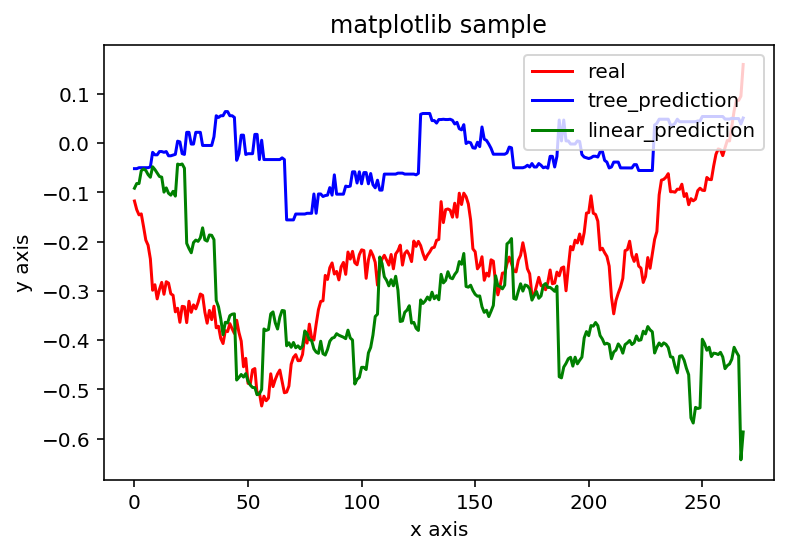

In [41]:
plt.plot(y_test,'red',label='real')
plt.plot(lgb_pred,'blue',label='tree_prediction')
plt.plot(ridge_pred,'green',label='linear_prediction')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()

In [34]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    def makedf(self):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

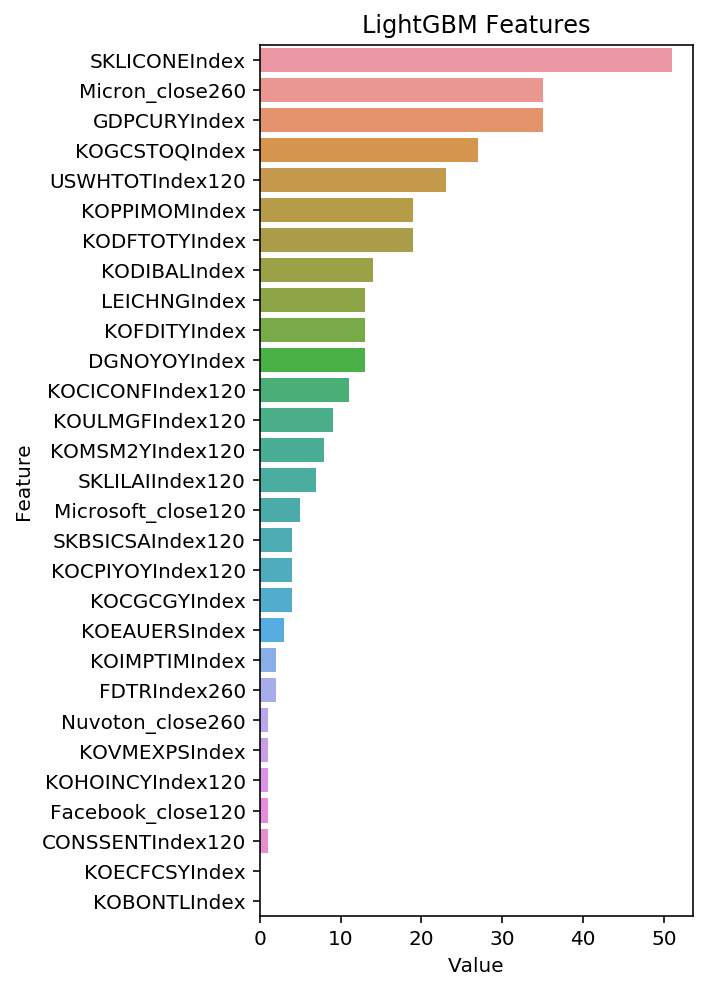

In [26]:
feat_imp = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_, X_train.columns)), columns = ['Value', 'Feature'])
feat_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 7))
sns.barplot(x = 'Value', y = 'Feature', data = feat_imp.sort_values(by = 'Value', ascending = False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.savefig('lgbm_importances_1.png')
plt.show()